# Ejemplo

Se solicita implementar la siguiente aproximación:

$$
  \sum_{n=1}^{\infty} \frac{1}{2^{n}} = \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \frac{1}{16} + \frac{1}{32} + \cdots
$$

1.   Implementar una función en Python que devuelva el valor de la serie, y los valores parciales de la serie. La función debe estar basada en un bucle `for`. Solo debe tener como parámetro la cantidad de elementos. Presente su resultado para 10 y 60 elementos, y muestre una gráfica de como cambiaron los valores parciales de la serie con el número de elementos.

2.   Implementar una función en Python que devuelva el valor de la serie, los valores parciales de la serie y la cantidad de iteraciones que fueron necesarias para calcular. La función debe estar basada en un bucle `while`. Solo debe tener como parámetros un valor referente, la precisión y la cantidad tope de iteraciones. Presente su resultado para un valor referente de 0.999, una precisión de 1e-1, 1e-2, 1e-3 y un máximo de 15 iteraciones.

3.   Implementar una función en Python que devuelva el valor de la serie, los valores parciales de la serie y la cantidad de iteraciones que fueron necesarias para calcular. La función debe estar basada en un bucle `while`. Solo debe tener como parámetro la precisión y la cantidad tope de iteraciones. Presente su resultado para una precisión de 1e-1, 1e-2, 1e-3 y un máximo de 15 iteraciones.

4.   Repetir los ítems 1, 2 y 3 en C. Justifique los tipos de datos de sus argumentos y del tipo de retorno de la función en sus comentarios. Adicionalmente, su función principal debe mostrar los resultados de todas sus funciones en la consola.

La presentación del laboratorio debe ser en un cuaderno de jupyter. Puede emplear Colab, Jupyter Notebook desde servidor, o la extensión de VSCode. No se aceptará ningún otro formato.


In [2]:
import matplotlib.pyplot as plt

### Pregunta 1

In [1]:
def serie_for(n):
    s = 0
    parciales = []
    for i in range(1, n+1):
        s += (1 / (2 ** i))
        parciales.append(s)
    return s, parciales

In [42]:
s, parciales = serie_for(10)

In [43]:
s, parciales

(0.9990234375,
 [0.5,
  0.75,
  0.875,
  0.9375,
  0.96875,
  0.984375,
  0.9921875,
  0.99609375,
  0.998046875,
  0.9990234375])

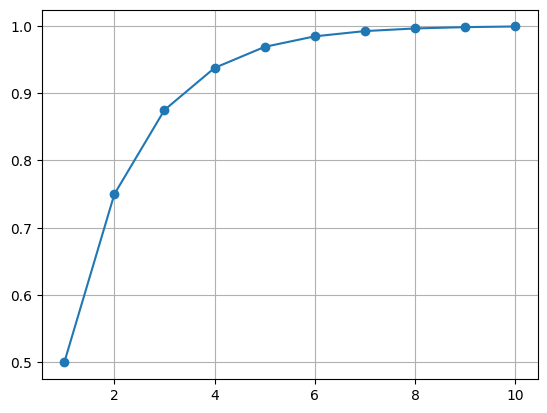

In [9]:
plt.plot(range(1,len(parciales)+1), parciales, '-o')
plt.grid(True)

In [10]:
s, parciales = serie_for(60)

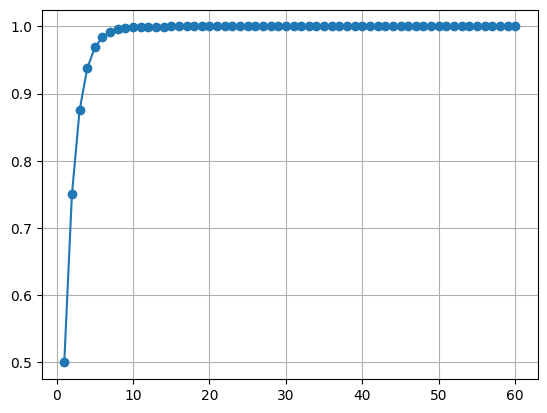

In [11]:
plt.plot(range(1,len(parciales)+1), parciales, '-o')
plt.grid(True)

### Pregunta 2

In [26]:
def serie_while_1(ref, tol, max_iter):
    s = 0
    i = 1
    parciales = []
    while (True):
        s += (1 / 2 ** i)
        parciales.append(s)
        er = abs(s - ref) / abs(ref)
        if er < tol:
            break
        if i > max_iter:
            break
        i += 1
    return s, parciales, i

In [29]:
serie_while_1(0.999, 1e-1, 15)

(0.9375, [0.5, 0.75, 0.875, 0.9375], 4)

In [30]:
serie_while_1(0.999, 1e-2, 15)

(0.9921875, [0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 0.9921875], 7)

In [31]:
serie_while_1(0.999, 1e-3, 15)

(0.998046875,
 [0.5,
  0.75,
  0.875,
  0.9375,
  0.96875,
  0.984375,
  0.9921875,
  0.99609375,
  0.998046875],
 9)

### Pregunta 3

In [32]:
def serie_while_2(tol, max_iter):
    s = 0
    i = 1
    parciales = []
    s_old = 1
    while (True):
        s += (1 / 2**i)
        parciales.append(s)

        er = abs(s - s_old) / abs(s_old)

        if er < tol:
            break

        if i > max_iter:
            break

        s_old = s

        i += 1

    return s, parciales, i
    

In [33]:
serie_while_2(1e-1, 15)

(0.9375, [0.5, 0.75, 0.875, 0.9375], 4)

In [34]:
serie_while_2(1e-2, 15)

(0.9921875, [0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 0.9921875], 7)

In [35]:
serie_while_2(1e-3, 15)

(0.9990234375,
 [0.5,
  0.75,
  0.875,
  0.9375,
  0.96875,
  0.984375,
  0.9921875,
  0.99609375,
  0.998046875,
  0.9990234375],
 10)

### Pregunta 4

In [76]:
%%file main.c
#include <stdlib.h>
#include <stdio.h>
#include <math.h>

double serie_for(int n, double* parciales){
    double s = 0.0;
    for(int i = 1; i <= n; i++){
        s += 1 / pow(2.0, (double)i);
        parciales[i-1] = s;
    }
    return s;
}

void item_1(int n){
    double* parciales = (double*)calloc(n, sizeof(double));
    double s = serie_for(n, parciales);
    printf("%lf, ", s);
    printf("[ ");
    for(int i = 0; i < n-1; i++){
        printf("%lf, ", parciales[i]);
    }
    printf("%lf ] \n", parciales[n-1]);
    free(parciales);
}

double serie_while_1(double ref, double tol, int max_iter, double* parciales, int* num_iter){
    double s = 0.0;
    int i = 1;
    double er = 0.0;
    while(1) {

        s += (1 / pow(2.0, (double)i));
        parciales[i-1] = s;

        er = fabs(s - ref) / fabs(ref);

        if (er < tol) {
            break;
        }

        if (i > max_iter) {
            break;
        }

        i++;
    }

    num_iter[0] = i;

    return s;
}

void item_2(double ref, double tol, int max_iter){
    double* parciales = (double*)calloc(max_iter, sizeof(double));
    int num_iter = 0;
    double s = serie_while_1(ref, tol, max_iter, parciales, &num_iter);
    printf("%lf, ", s);
    printf("[ ");
    for(int i = 0; i < num_iter-1; i++){
        printf("%lf, ", parciales[i]);
    }
    printf("%lf ], ", parciales[num_iter-1]);
    printf("%d\n", num_iter);
    free(parciales);
}

double serie_while_2(double tol, int max_iter, double* parciales, int* num_iter){
    double s = 0.0;
    int i = 1;
    double s_old = 1.0;
    double er = 0.0;
    while(1) {

        s += (1 / pow(2.0, (double)i));
        parciales[i-1] = s;

        er = fabs(s - s_old) / fabs(s_old);

        if (er < tol) {
            break;
        }

        if (i > max_iter) {
            break;
        }

        s_old = s;
        i++;
    }

    num_iter[0] = i;

    return s;
}

void item_3(double tol, int max_iter){
    double* parciales = (double*)calloc(max_iter, sizeof(double));
    int num_iter = 0;
    double s = serie_while_2(tol, max_iter, parciales, &num_iter);
    printf("%lf, ", s);
    printf("[ ");
    for(int i = 0; i < num_iter-1; i++){
        printf("%lf, ", parciales[i]);
    }
    printf("%lf ], ", parciales[num_iter-1]);
    printf("%d\n", num_iter);
    free(parciales);
}

int main(){

    int n = 10;
    item_1(n);
    n = 60;
    item_1(n);

    double ref = 0.999;
    double tol = 1e-1;
    int max_iter = 15;
    item_2(ref, tol, max_iter);

    tol = 1e-2;
    item_2(ref, tol, max_iter);

    tol = 1e-3;
    item_2(ref, tol, max_iter);

    tol = 1e-1;
    item_3(tol, max_iter);

    tol = 1e-2;
    item_3(tol, max_iter);

    tol = 1e-3;
    item_3(tol, max_iter);

    return 0;
}

Overwriting main.c


In [77]:
! gcc main.c -o main -lm

In [78]:
! ./main

0.999023, [ 0.500000, 0.750000, 0.875000, 0.937500, 0.968750, 0.984375, 0.992188, 0.996094, 0.998047, 0.999023 ] 
1.000000, [ 0.500000, 0.750000, 0.875000, 0.937500, 0.968750, 0.984375, 0.992188, 0.996094, 0.998047, 0.999023, 0.999512, 0.999756, 0.999878, 0.999939, 0.999969, 0.999985, 0.999992, 0.999996, 0.999998, 0.999999, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000 ] 
0.937500, [ 0.500000, 0.750000, 0.875000, 0.937500 ], 4
0.992188, [ 0.500000, 0.750000, 0.875000, 0.937500, 0.968750, 0.984375, 0.992188 ], 7
0.998047, [ 0.500000, 0.750000, 0.875000, 0.937500, 0.968750, 0.984375, 0.992188, 0.996094, 0.998047 ], 9
0.937500, [ 0.500000, 0.